In [19]:
import numpy as np
import pandas as pd
from scipy.special import softmax
from scipy.stats import entropy
import seaborn as sns

In [21]:
df = pd.read_parquet("Logits_examples_window-512_tokenization-no_model-convnet800kfinetune200k.parquet")
df

,Region,chromosome,pos,a,c,g,t
0,intron,Chr5,7275282,0.249038,-0.070743,-0.520135,0.765546
1,cds,Chr5,26840599,0.882219,-2.128277,0.397106,1.204065
2,cds,Chr5,19229322,-0.129852,-0.127279,-0.675762,1.283355
3,five_prime_utr,Chr5,3480405,0.113846,-1.453188,0.599078,1.146482
4,intron,Chr5,6244139,0.021993,-0.029042,-0.205541,0.613958
...,...,...,...,...,...,...,...
49995,five_prime_utr,Chr5,26380232,-0.018809,0.353867,-0.323643,0.421426
49996,three_prime_utr,Chr5,21113476,0.232279,-0.112342,-0.169289,0.485576
49997,intron,Chr5,5354243,0.920878,-0.278750,-0.522419,0.310929
49998,cds,Chr5,2013051,0.020267,-0.000284,-0.163119,0.619406


In [22]:
nucleotides = ["a", "c", "g", "t"]
df.loc[:, nucleotides] = softmax(df[nucleotides].values, axis=1)
df

,Region,chromosome,pos,a,c,g,t
0,intron,Chr5,7275282,0.258674,0.187877,0.119869,0.433580
1,cds,Chr5,26840599,0.328454,0.016182,0.202205,0.453159
2,cds,Chr5,19229322,0.149454,0.149839,0.086581,0.614125
3,five_prime_utr,Chr5,3480405,0.177252,0.036986,0.287956,0.497806
4,intron,Chr5,6244139,0.219574,0.208649,0.174889,0.396888
...,...,...,...,...,...,...,...
49995,five_prime_utr,Chr5,26380232,0.210884,0.306123,0.155474,0.327519
49996,three_prime_utr,Chr5,21113476,0.272775,0.193258,0.182560,0.351407
49997,intron,Chr5,5354243,0.480577,0.144801,0.113487,0.261135
49998,cds,Chr5,2013051,0.215859,0.211468,0.179691,0.392982


In [23]:
df["entropy"] = entropy(df[nucleotides], axis=1)
df

,Region,chromosome,pos,a,c,g,t,entropy
0,intron,Chr5,7275282,0.258674,0.187877,0.119869,0.433580,1.280518
1,cds,Chr5,26840599,0.328454,0.016182,0.202205,0.453159,1.114320
2,cds,Chr5,19229322,0.149454,0.149839,0.086581,0.614125,1.079758
3,five_prime_utr,Chr5,3480405,0.177252,0.036986,0.287956,0.497806,1.134362
4,intron,Chr5,6244139,0.219574,0.208649,0.174889,0.396888,1.331565
...,...,...,...,...,...,...,...,...
49995,five_prime_utr,Chr5,26380232,0.210884,0.306123,0.155474,0.327519,1.345568
49996,three_prime_utr,Chr5,21113476,0.272775,0.193258,0.182560,0.351407,1.350009
49997,intron,Chr5,5354243,0.480577,0.144801,0.113487,0.261135,1.229550
49998,cds,Chr5,2013051,0.215859,0.211468,0.179691,0.392982,1.334978


In [24]:
df["perplexity"] = np.exp(df.entropy)

<AxesSubplot:xlabel='perplexity', ylabel='Proportion'>

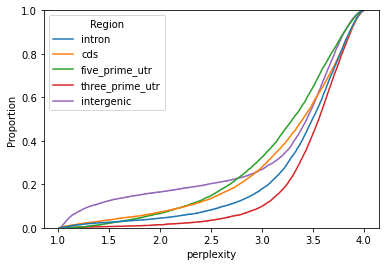

In [27]:
sns.ecdfplot(
    data=df,
    hue="Region",
    x="perplexity",
)

<AxesSubplot:xlabel='entropy', ylabel='Proportion'>

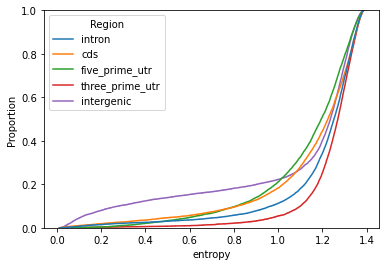

In [28]:
sns.ecdfplot(
    data=df,
    hue="Region",
    x="entropy",
)

<AxesSubplot:xlabel='Region', ylabel='perplexity'>

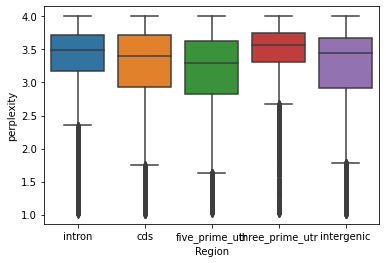

In [29]:
sns.boxplot(
    data=df,
    x="Region",
    y="perplexity",
)

<AxesSubplot:xlabel='Region', ylabel='entropy'>

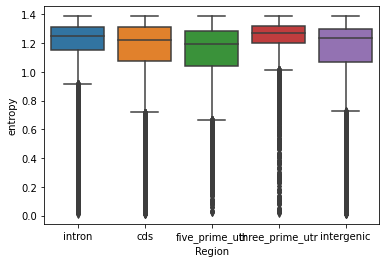

In [30]:
sns.boxplot(
    data=df,
    x="Region",
    y="entropy",
)